<a href="https://colab.research.google.com/github/Ajayrajc1998/multivariate_LSTM/blob/main/notebook988f384b51.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# IMPORTANT: RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES,
# THEN FEEL FREE TO DELETE THIS CELL.
# NOTE: THIS NOTEBOOK ENVIRONMENT DIFFERS FROM KAGGLE'S PYTHON
# ENVIRONMENT SO THERE MAY BE MISSING LIBRARIES USED BY YOUR
# NOTEBOOK.
import kagglehub
rohanrao_nifty50_stock_market_data_path = kagglehub.dataset_download('rohanrao/nifty50-stock-market-data')

print('Data source import complete.')


In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [ ]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("rohanrao/nifty50-stock-market-data")

print("Path to dataset files:", path)

Path to dataset files: /kaggle/input/nifty50-stock-market-data


In [ ]:
import pandas as pd
df=pd.read_csv('/kaggle/input/nifty50-stock-market-data/BAJAJ-AUTO.csv')
df.head()

,Date,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
0,2008-05-26,BAJAJ-AUTO,EQ,2101.05,898.00,898.0,551.35,600.25,604.75,624.61,3972485,2.481245e+14,NaN,1202933,0.3028
1,2008-05-27,BAJAJ-AUTO,EQ,604.75,624.70,639.0,580.30,595.50,593.15,606.43,1751063,1.061901e+14,NaN,369389,0.2110
2,2008-05-28,BAJAJ-AUTO,EQ,593.15,561.65,621.9,561.65,605.10,608.15,608.75,1652355,1.005877e+14,NaN,898602,0.5438
3,2008-05-29,BAJAJ-AUTO,EQ,608.15,619.40,619.4,576.00,600.00,599.45,600.98,669269,4.022165e+13,NaN,449951,0.6723
4,2008-05-30,BAJAJ-AUTO,EQ,599.45,605.40,607.0,538.00,576.25,571.70,565.55,1262117,7.137937e+13,NaN,936432,0.7420


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3202 entries, 0 to 3201
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Date                3202 non-null   object 
 1   Symbol              3202 non-null   object 
 2   Series              3202 non-null   object 
 3   Prev Close          3202 non-null   float64
 4   Open                3202 non-null   float64
 5   High                3202 non-null   float64
 6   Low                 3202 non-null   float64
 7   Last                3202 non-null   float64
 8   Close               3202 non-null   float64
 9   VWAP                3202 non-null   float64
 10  Volume              3202 non-null   int64  
 11  Turnover            3202 non-null   float64
 12  Trades              2456 non-null   float64
 13  Deliverable Volume  3202 non-null   int64  
 14  %Deliverble         3202 non-null   float64
dtypes: float64(10), int64(2), object(3)
memory usage: 375.4

In [ ]:
df.isnull().sum()

Date                    0
Symbol                  0
Series                  0
Prev Close              0
Open                    0
High                    0
Low                     0
Last                    0
Close                   0
VWAP                    0
Volume                  0
Turnover                0
Trades                746
Deliverable Volume      0
%Deliverble             0
dtype: int64

In [ ]:
df['Trades']=df['Trades'].fillna(df['Trades'].mean())

In [ ]:
df.isnull().sum()

Date                  0
Symbol                0
Series                0
Prev Close            0
Open                  0
High                  0
Low                   0
Last                  0
Close                 0
VWAP                  0
Volume                0
Turnover              0
Trades                0
Deliverable Volume    0
%Deliverble           0
dtype: int64

In [ ]:
df['Symbol'].unique()

array(['BAJAJ-AUTO'], dtype=object)

In [ ]:
df.drop('Series',axis=1,inplace=True)

In [ ]:
df['Date']=pd.to_datetime(df['Date'])
df.index=df['Date']
df.drop('Date',axis=1,inplace=True)

In [ ]:
df.head()

,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
Date,,,,,,,,,,,,
2008-05-26,2101.05,898.00,898.0,551.35,600.25,604.75,624.61,3972485,2.481245e+14,27487.876629,1202933,0.3028
2008-05-27,604.75,624.70,639.0,580.30,595.50,593.15,606.43,1751063,1.061901e+14,27487.876629,369389,0.2110
2008-05-28,593.15,561.65,621.9,561.65,605.10,608.15,608.75,1652355,1.005877e+14,27487.876629,898602,0.5438
2008-05-29,608.15,619.40,619.4,576.00,600.00,599.45,600.98,669269,4.022165e+13,27487.876629,449951,0.6723
2008-05-30,599.45,605.40,607.0,538.00,576.25,571.70,565.55,1262117,7.137937e+13,27487.876629,936432,0.7420


In [ ]:
from pandas import DataFrame, concat

def series_to_supervised(data, n_in=1, n_out=1, dropnan=True, prefix="var", column_names=None):
    # Convert input to DataFrame
    df = DataFrame(data)

    # Use provided column names or infer from the DataFrame
    if column_names is None:
        column_names = df.columns  # Use original column names if not explicitly provided
    else:
        if len(column_names) != df.shape[1]:
            raise ValueError("Length of column_names must match the number of columns in data")

    cols, names = list(), list()

    # Create input sequence (t-n, ..., t-1)
    for i in range(n_in, 0, -1):
        cols.append(df.shift(i))
        names += [f'{col}_{prefix}(t-{i})' for col in column_names]

    # Create output sequence (t, t+1, ..., t+n)
    for i in range(0, n_out):
        cols.append(df.shift(-i))
        if i == 0:
            names += [f'{col}_{prefix}(t)' for col in column_names]
        else:
            names += [f'{col}_{prefix}(t+{i})' for col in column_names]

    # Combine all columns
    agg = concat(cols, axis=1)
    agg.columns = names  # Assign meaningful column names

    # Optionally drop rows with NaN values
    if dropnan:
        agg.dropna(inplace=True)
    print('Completed series_to_supervised transformation.')
    return agg


In [ ]:
from sklearn.preprocessing import MinMaxScaler
values=df.values
values=values.astype('float32')
scaled_values=scaler.fit_transform(values)
reframed=series_to_supervised(scaled_values,1,1,column_names=df.columns)
reframed.head()

Completed series_to_supervised transformation.


,Prev Close_var(t-1),Open_var(t-1),High_var(t-1),Low_var(t-1),Last_var(t-1),Close_var(t-1),VWAP_var(t-1),Volume_var(t-1),Turnover_var(t-1),Trades_var(t-1),...,High_var(t),Low_var(t),Last_var(t),Close_var(t),VWAP_var(t),Volume_var(t),Turnover_var(t),Trades_var(t),Deliverable Volume_var(t),%Deliverble_var(t)
1,0.457153,0.159080,0.145757,0.073476,0.076283,0.076952,0.081503,0.465007,0.072134,0.068002,...,0.081875,0.080828,0.075076,0.074005,0.076910,0.204648,0.030830,0.068002,0.088630,0.148867
2,0.076952,0.090720,0.081875,0.080828,0.075076,0.074005,0.076910,0.204648,0.030830,0.068002,...,0.077657,0.076092,0.077515,0.077816,0.077496,0.193080,0.029199,0.068002,0.216053,0.507875
3,0.074005,0.074950,0.077657,0.076092,0.077515,0.077816,0.077496,0.193080,0.029199,0.068002,...,0.077041,0.079736,0.076220,0.075606,0.075533,0.077859,0.011632,0.068002,0.108028,0.646494
4,0.077816,0.089395,0.077041,0.079736,0.076220,0.075606,0.075533,0.077859,0.011632,0.068002,...,0.073982,0.070086,0.070185,0.068555,0.066583,0.147342,0.020699,0.068002,0.225162,0.721683
5,0.075606,0.085893,0.073982,0.070086,0.070185,0.068555,0.066583,0.147342,0.020699,0.068002,...,0.075955,0.078390,0.069360,0.070867,0.074856,0.023637,0.003525,0.068002,0.016403,0.283603


In [ ]:
from sklearn.preprocessing import MinMaxScaler
values=df.values
values=values.astype('float32')
##scaled_values=scaler.fit_transform(values)
reframed=series_to_supervised(values,1,1,column_names=df.columns)
reframed.head()

Completed series_to_supervised transformation.


,Prev Close_var(t-1),Open_var(t-1),High_var(t-1),Low_var(t-1),Last_var(t-1),Close_var(t-1),VWAP_var(t-1),Volume_var(t-1),Turnover_var(t-1),Trades_var(t-1),...,High_var(t),Low_var(t),Last_var(t),Close_var(t),VWAP_var(t),Volume_var(t),Turnover_var(t),Trades_var(t),Deliverable Volume_var(t),%Deliverble_var(t)
1,2101.050049,898.000000,898.000000,551.349976,600.250000,604.750000,624.609985,3972485.0,2.481245e+14,27487.876953,...,639.000000,580.299988,595.500000,593.150024,606.429993,1751063.0,1.061901e+14,27487.876953,369389.0,0.2110
2,604.750000,624.700012,639.000000,580.299988,595.500000,593.150024,606.429993,1751063.0,1.061901e+14,27487.876953,...,621.900024,561.650024,605.099976,608.150024,608.750000,1652355.0,1.005877e+14,27487.876953,898602.0,0.5438
3,593.150024,561.650024,621.900024,561.650024,605.099976,608.150024,608.750000,1652355.0,1.005877e+14,27487.876953,...,619.400024,576.000000,600.000000,599.450012,600.979980,669269.0,4.022165e+13,27487.876953,449951.0,0.6723
4,608.150024,619.400024,619.400024,576.000000,600.000000,599.450012,600.979980,669269.0,4.022165e+13,27487.876953,...,607.000000,538.000000,576.250000,571.700012,565.549988,1262117.0,7.137937e+13,27487.876953,936432.0,0.7420
5,599.450012,605.400024,607.000000,538.000000,576.250000,571.700012,565.549988,1262117.0,7.137937e+13,27487.876953,...,615.000000,570.700012,573.000000,580.799988,598.299988,206640.0,1.236326e+13,27487.876953,69415.0,0.3359


In [ ]:
reframed.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3201 entries, 1 to 3201
Data columns (total 24 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Prev Close_var(t-1)          3201 non-null   float32
 1   Open_var(t-1)                3201 non-null   float32
 2   High_var(t-1)                3201 non-null   float32
 3   Low_var(t-1)                 3201 non-null   float32
 4   Last_var(t-1)                3201 non-null   float32
 5   Close_var(t-1)               3201 non-null   float32
 6   VWAP_var(t-1)                3201 non-null   float32
 7   Volume_var(t-1)              3201 non-null   float32
 8   Turnover_var(t-1)            3201 non-null   float32
 9   Trades_var(t-1)              3201 non-null   float32
 10  Deliverable Volume_var(t-1)  3201 non-null   float32
 11  %Deliverble_var(t-1)         3201 non-null   float32
 12  Prev Close_var(t)            3201 non-null   float32
 13  Open_var(t)            

In [ ]:
df.index.min()

Timestamp('2008-05-26 00:00:00')

In [ ]:
df.index.max()

Timestamp('2021-04-30 00:00:00')

In [ ]:
filter_col=reframed.iloc[:,:output_col_index+1]
filter_col.head()

,Prev Close_var(t-1),Open_var(t-1),High_var(t-1),Low_var(t-1),Last_var(t-1),Close_var(t-1),VWAP_var(t-1),Volume_var(t-1),Turnover_var(t-1),Trades_var(t-1),Deliverable Volume_var(t-1),%Deliverble_var(t-1),Prev Close_var(t),Open_var(t),High_var(t),Low_var(t),Last_var(t),Close_var(t)
1,2101.050049,898.000000,898.000000,551.349976,600.250000,604.750000,624.609985,3972485.0,2.481245e+14,27487.876953,1202933.0,0.3028,604.750000,624.700012,639.000000,580.299988,595.500000,593.150024
2,604.750000,624.700012,639.000000,580.299988,595.500000,593.150024,606.429993,1751063.0,1.061901e+14,27487.876953,369389.0,0.2110,593.150024,561.650024,621.900024,561.650024,605.099976,608.150024
3,593.150024,561.650024,621.900024,561.650024,605.099976,608.150024,608.750000,1652355.0,1.005877e+14,27487.876953,898602.0,0.5438,608.150024,619.400024,619.400024,576.000000,600.000000,599.450012
4,608.150024,619.400024,619.400024,576.000000,600.000000,599.450012,600.979980,669269.0,4.022165e+13,27487.876953,449951.0,0.6723,599.450012,605.400024,607.000000,538.000000,576.250000,571.700012
5,599.450012,605.400024,607.000000,538.000000,576.250000,571.700012,565.549988,1262117.0,7.137937e+13,27487.876953,936432.0,0.7420,571.700012,605.500000,615.000000,570.700012,573.000000,580.799988


In [ ]:
values=filter_col.values
scaler=MinMaxScaler(feature_range=(0,1))
scaled_values=scaler.fit_transform(values)

In [ ]:
scaled_values

array([[0.45715338, 0.15907955, 0.14575705, ..., 0.08082784, 0.07507621,
        0.0740049 ],
       [0.0769524 , 0.09072036, 0.08187503, ..., 0.07609194, 0.07751524,
        0.07781632],
       [0.0740049 , 0.07494999, 0.07765735, ..., 0.07973591, 0.07621951,
        0.07560571],
       ...,
       [0.87330866, 0.8696474 , 0.8610382 , ..., 0.90020317, 0.9113694 ,
        0.91165143],
       [0.8851621 , 0.8874563 , 0.8995154 , ..., 0.90022856, 0.89404213,
        0.8981082 ],
       [0.91165143, 0.9207104 , 0.8995894 , ..., 0.89842564, 0.89608735,
        0.8974222 ]], dtype=float32)

In [ ]:
scaled_values.shape

(3201, 18)

In [ ]:
# # Split data into training, validation, and testing sets
# #values = reframed.values

# # Define the number of training and validation days
# n_train_days = round(len(filter_col)*(60/100),0)  # 8 years of daily data for training
# n_validation_days = n_train_days+round(len(filter_col)*(20/100),0)  # 1 year of daily data for validation

# # Determine slices for train, validation, and test
# train = scaled_values[:n_train_days, :]  # First part for training
# validation = scaled_values[n_train_days:n_train_days + n_validation_days, :]  # Next part for validation
# test = scaled_values[n_train_days + n_validation_days:, :]  # Remaining part for testing

# # Specify the index for the output column
# output_col_index = 17  # 18th column (zero-based index)

# # Split into input (X) and output (y) for training
# train_X = train[:, :output_col_index+1]  # All columns before the output
# train_y = train[:, output_col_index+1]  # The 18th column (output)

# # Split into input (X) and output (y) for validation
# validation_X = validation[:, :output_col_index+1]
# validation_y = validation[:, output_col_index+1]

# # Split into input (X) and output (y) for testing
# test_X = test[:, :output_col_index+1]
# test_y = test[:, output_col_index+1]

# # Reshape input to be 3D [samples, timesteps, features]
# train_X = train_X.reshape((train_X.shape[0], 1, train_X.shape[1]))
# validation_X = validation_X.reshape((validation_X.shape[0], 1, validation_X.shape[1]))
# test_X = test_X.reshape((test_X.shape[0], 1, test_X.shape[1]))

# # Print the shapes
# print("Training set shapes:")
# print(train_X.shape, train_y.shape)

# print("\nValidation set shapes:")
# print(validation_X.shape, validation_y.shape)

# print("\nTest set shapes:")
# print(test_X.shape, test_y.shape)


TypeError: slice indices must be integers or None or have an __index__ method

In [ ]:
train

array([[0.45715338, 0.15907955, 0.14575705, ..., 0.06800156, 0.08863017,
        0.14886731],
       [0.0769524 , 0.09072036, 0.08187503, ..., 0.06800156, 0.21605307,
        0.5078749 ],
       [0.0740049 , 0.07494999, 0.07765735, ..., 0.06800156, 0.10802773,
        0.6464941 ],
       ...,
       [0.61027044, 0.59479743, 0.60452354, ..., 0.1603151 , 0.06269716,
        0.32060415],
       [0.618249  , 0.6035518 , 0.58775145, ..., 0.12947443, 0.05725197,
        0.32297736],
       [0.577162  , 0.57978994, 0.5729525 , ..., 0.16464616, 0.07231168,
        0.32826322]], dtype=float32)

In [ ]:
n_train_days = round(len(filter_col)*(60/100),0)  # 8 years of daily data for training
n_validation_days = n_train_days+round(len(filter_co)*(20/100),0)
n_test_days=n_validation_days+round(len(reframed)*(20/100),0)
print(n_train_days,'train_size')
print(n_validation_days,'validation_size')
print(n_test_days,'test size')

1921.0 train_size
2561.0 validation_size
3201.0 test size


In [ ]:
# Define the number of training, validation and testing days
n_train_days = int(round(len(filter_col)*(60/100),0))
n_validation_days = int(n_train_days+round(len(filter_col)*(20/100),0))
n_test_days=int(n_validation_days+round(len(filter_col)*(20/100),0))

# Determine slices for train, validation, and test
train = scaled_values[:n_train_days, :]  # First part for training
validation = scaled_values[n_train_days:n_validation_days, :]  # Next part for validation
test = scaled_values[n_validation_days:, :]  # Remaining part for testing

train_X, train_y = train[:, :-1], train[:, -1]
val_X,val_y=validation[:,:-1],validation[:,-1]
test_X, test_y = test[:, :-1], test[:, -1]

train_X = train_X.reshape((train_X.shape[0], 1, train_X.shape[1]))
test_X = test_X.reshape((test_X.shape[0], 1, test_X.shape[1]))
val_X=val_X.reshape((val_X.shape[0],1,val_X.shape[1]))

In [ ]:
train_X.shape

(1921, 1, 17)

In [ ]:
val_X.shape

(640, 1, 17)

In [ ]:
test_X.shape

(640, 1, 17)

In [ ]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM

# design network
model = Sequential()
model.add(LSTM(50, input_shape=(train_X.shape[1], train_X.shape[2])))
model.add(Dense(1))
model.compile(loss='mae', optimizer='adam')
# fit network
history = model.fit(train_X, train_y, epochs=10, batch_size=72, validation_data=(val_X, val_y), verbose=2, shuffle=False)
# plot history

Epoch 1/10


/opt/conda/lib/python3.10/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


27/27 - 2s - 82ms/step - loss: 0.1720 - val_loss: 0.0535
Epoch 2/10
27/27 - 0s - 4ms/step - loss: 0.0695 - val_loss: 0.0713
Epoch 3/10
27/27 - 0s - 4ms/step - loss: 0.0300 - val_loss: 0.0139
Epoch 4/10
27/27 - 0s - 4ms/step - loss: 0.0286 - val_loss: 0.0134
Epoch 5/10
27/27 - 0s - 4ms/step - loss: 0.0156 - val_loss: 0.0089
Epoch 6/10
27/27 - 0s - 4ms/step - loss: 0.0098 - val_loss: 0.0070
Epoch 7/10
27/27 - 0s - 4ms/step - loss: 0.0076 - val_loss: 0.0069
Epoch 8/10
27/27 - 0s - 4ms/step - loss: 0.0068 - val_loss: 0.0066
Epoch 9/10
27/27 - 0s - 4ms/step - loss: 0.0067 - val_loss: 0.0070
Epoch 10/10
27/27 - 0s - 4ms/step - loss: 0.0062 - val_loss: 0.0066


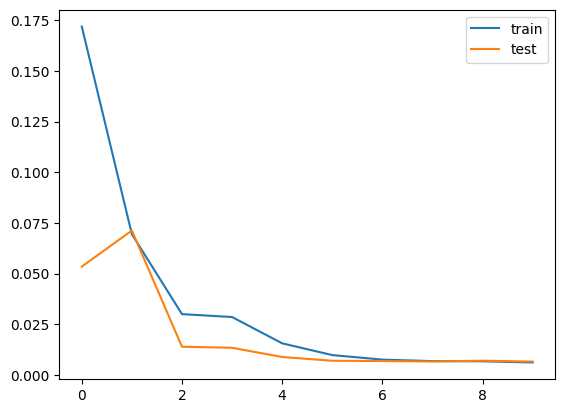

In [ ]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show()

In [ ]:
y_hat=model.predict(test_X)

20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 


In [ ]:
test_X=test_X.reshape((test_X.shape[0],test_X.shape[2]))

IndexError: tuple index out of range

In [ ]:
print(y_hat[:10])

[[0.53140783]
 [0.54715   ]
 [0.54122627]
 [0.4688277 ]
 [0.54614645]
 [0.6021456 ]
 [0.5283284 ]
 [0.48002008]
 [0.4614496 ]
 [0.5468597 ]]


In [ ]:
print(test_y[:10])

[0.40075517 0.46655887 0.28996766 0.43387276 0.48166132 0.35156423
 0.37842506 0.21229777 0.51014024 0.2851133 ]


In [ ]:
from sklearn.metrics import mean_squared_error
mean_squared_error(test_y,y_hat)

0.0001539049

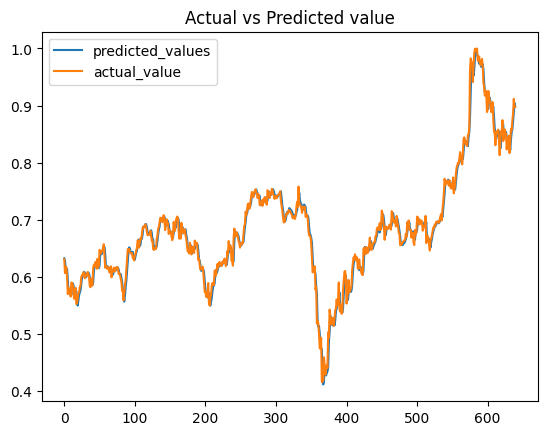

<Figure size 4000x6000 with 0 Axes>

In [ ]:
import matplotlib.pyplot as plt

plt.plot(y_hat,label='predicted_values')
plt.plot(test_y,label='actual_value')
plt.title('Actual vs Predicted value')
plt.legend()
plt.figure(figsize=(40,60))
plt.show()

In [ ]:
import matplotlib.pyplot as plt

# Ensure that test_X is a DataFrame
# Plot actual vs predicted values using the index of test_X as x-axis
plt.figure(figsize=(10, 6))  # Adjust the figure size as needed
plt.plot(test_X.index, y_hat, label='Predicted Values')  # y_hat should be a 1D array
plt.plot(test_X.index, test_y, label='Actual Values')
plt.title('Actual vs Predicted Values')
plt.xlabel('Index')  # Optional: You can label it as Date or Time if your index represents time
plt.ylabel('Value')  # Label for the y-axis
plt.legend()
plt.show()

In [ ]:
y_hat.shape

(640, 1)

In [ ]:
test_X.shape

(640, 17)

In [ ]:
inv_yhat=np.concatenate((y_hat,test_X[:,1:]),axis=1)
inv_yhat.shape

(640, 17)

In [ ]:
inv_yhat

array([[0.6320942 , 0.633942  , 0.617041  , ..., 0.6212957 , 0.63392586,
        0.6306275 ],
       [0.6284063 , 0.6281641 , 0.6212957 , ..., 0.61684364, 0.6028441 ,
        0.60721546],
       [0.6135727 , 0.6343172 , 0.61684364, ..., 0.6013171 , 0.59867954,
        0.61864835],
       ...,
       [0.88622683, 0.8696474 , 0.8610382 , ..., 0.8995154 , 0.90020317,
        0.9113694 ],
       [0.9044775 , 0.8874563 , 0.8995154 , ..., 0.8995894 , 0.90022856,
        0.89404213],
       [0.89833975, 0.9207104 , 0.8995894 , ..., 0.90256155, 0.89842564,
        0.89608735]], dtype=float32)

In [ ]:
inv_yhat = np.concatenate((y_hat, test_X), axis=1)
print(inv_yhat.shape)  # Expected output: (640, 18)

(640, 18)


In [ ]:
inv_y.shape

(640,)

In [ ]:
test_y.shape

(640, 1)

In [ ]:
inv_yhat

array([[2789.5386, 2788.2605, 2877.2727, ..., 2708.6624, 2795.1323,
        2783.7664],
       [2775.0244, 2772.6165, 2853.847 , ..., 2691.1301, 2672.7944,
        2691.627 ],
       [2716.6462, 2783.0288, 2878.794 , ..., 2629.9868, 2656.4028,
        2736.6216],
       ...,
       [3789.6902, 3753.4878, 3832.9048, ..., 3804.2915, 3843.1997,
        3888.64  ],
       [3861.5166, 3800.878 , 3905.1082, ..., 3804.583 , 3843.2998,
        3820.4478],
       [3837.361 , 3906.7822, 4039.932 , ..., 3816.2874, 3836.2034,
        3828.4968]], dtype=float32)

In [ ]:
test_X

array([[0.6318811 , 0.633942  , 0.617041  , ..., 0.6212957 , 0.63392586,
        0.6306275 ],
       [0.62796813, 0.6281641 , 0.6212957 , ..., 0.61684364, 0.6028441 ,
        0.60721546],
       [0.63057256, 0.6343172 , 0.61684364, ..., 0.6013171 , 0.59867954,
        0.61864835],
       ...,
       [0.87330866, 0.8696474 , 0.8610382 , ..., 0.8995154 , 0.90020317,
        0.9113694 ],
       [0.8851621 , 0.8874563 , 0.8995154 , ..., 0.8995894 , 0.90022856,
        0.89404213],
       [0.91165143, 0.9207104 , 0.8995894 , ..., 0.90256155, 0.89842564,
        0.89608735]], dtype=float32)

In [ ]:
inv_y

array([2783.55  , 2687.45  , 2730.1   , 2731.4   , 2657.    , 2543.05  ,
       2584.1   , 2548.85  , 2581.8   , 2525.8   , 2623.05  , 2620.45  ,
       2610.5   , 2547.8   , 2510.25  , 2556.9   , 2586.5   , 2475.15  ,
       2477.55  , 2513.75  , 2549.1   , 2556.25  , 2593.7   , 2598.85  ,
       2657.75  , 2672.55  , 2674.6   , 2692.55  , 2693.05  , 2652.3   ,
       2665.5   , 2676.5   , 2668.85  , 2695.35  , 2679.65  , 2666.5   ,
       2604.65  , 2590.35  , 2649.5   , 2599.65  , 2603.9   , 2724.    ,
       2745.7   , 2736.    , 2763.85  , 2764.1   , 2718.1   , 2786.2   ,
       2725.1   , 2739.6   , 2848.4   , 2836.1   , 2823.15  , 2840.95  ,
       2840.9   , 2863.    , 2887.2   , 2808.45  , 2724.65  , 2734.6   ,
       2737.    , 2717.5   , 2720.15  , 2726.65  , 2692.    , 2701.35  ,
       2734.2   , 2658.55  , 2694.85  , 2696.9   , 2725.3   , 2720.95  ,
       2699.15  , 2725.85  , 2717.45  , 2729.65  , 2720.75  , 2684.6   ,
       2688.35  , 2674.1   , 2651.65  , 2626.35  , 

In [ ]:

#test_X=test_X.reshape((test_X.shape[0],test_X.shape[2]))
inv_yhat = np.concatenate((y_hat, test_X), axis=1)
inv_yhat=scaler.inverse_transform(inv_yhat)
test_y = test_y.reshape((len(test_y), 1))
inv_y = np.concatenate((test_y, test_X), axis=1)
inv_y = scaler.inverse_transform(inv_y)
inv_y = inv_y[:,0]
test_y=a
#calculate RMSE
rmse = (mean_squared_error(inv_y, inv_yhat))
print('Test RMSE: %.3f' % rmse)

ValueError: y_true and y_pred have different number of output (1!=18)